In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns

### Messwerte

In [4]:
from utils.functions_08 import compute_mean_curve
from utils.functions_08 import plot_dsc_values_with_mean
from utils.functions_08 import analyze_clusters_with_percentages

In [5]:
file_path = "data/02_dsc_thermogram.csv"
df_experiments = pd.read_csv(file_path, index_col=0)

columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_experiments_s5 = df_experiments[columns_s5]
df_experiments_s5.head()

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866


In [6]:
df_dsc = pd.read_csv("data/00_dsc.csv", index_col=0)
df_dsc.head()

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.39,5.796,130.5


## I) Cluster nach euklidischer Distanz
> basierend auf Mittelwerten

In [8]:
file_path = "data/051_mean_clustering.csv"
df_clustering_mean = pd.read_csv(file_path, index_col=0)
df_clustering_mean.head(3)

,Probe,Cluster
0,L001_S5,1
1,L002_S5,1
2,L003_S5,1


In [9]:
# Liste von Dict mit Clustern (Keys) und dazugehörigen Samples
cluster_to_samples = df_clustering_mean.groupby('Cluster')['Probe'].apply(list).to_dict()

#cluster_2, samples_2 = list(cluster_to_samples.items())[1]
#compute_mean_curve(df_experiments_s5, samples_2).head()

### Plots mit Mittelwert-Kurve

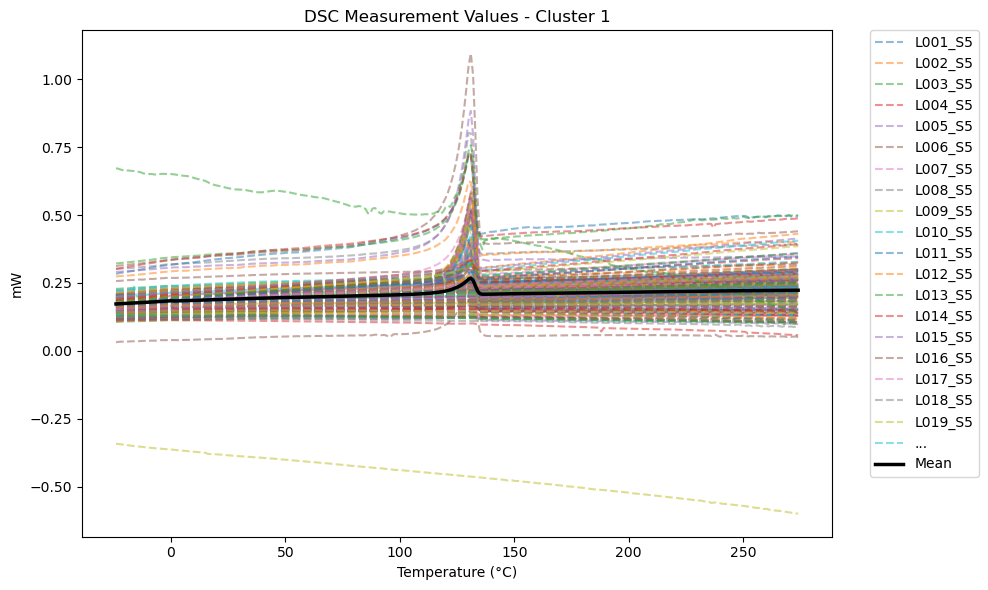

                    Count  Anteil (%)
Matrix                               
Modellsand             90       29.51
Sediment Weißeritz     45       14.75
Sediment Elbe          45       14.75
Sand                   39       12.79
Nicht vorhanden        86       28.20
------------------------------------------------------------------------------------------------------------------------


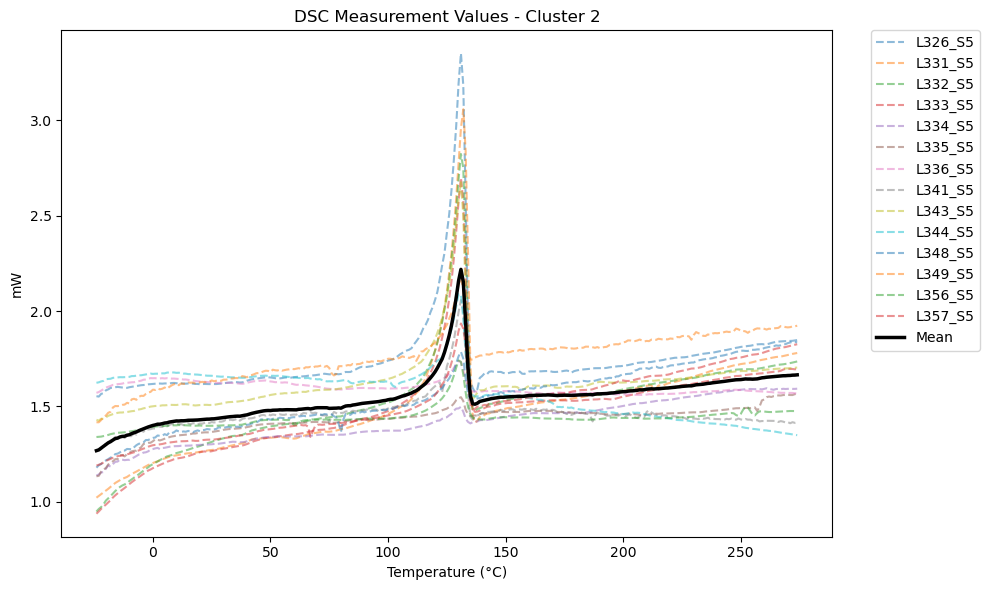

                    Count  Anteil (%)
Matrix                               
Sediment Elbe           7        50.0
Sediment Weißeritz      7        50.0
------------------------------------------------------------------------------------------------------------------------


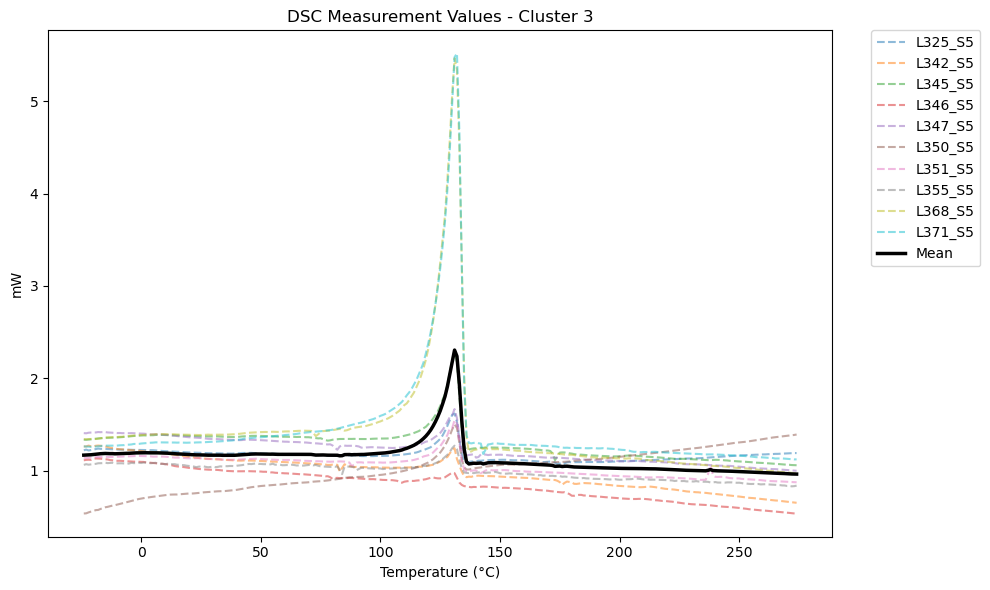

                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz      7        70.0
Sand                    2        20.0
Sediment Elbe           1        10.0
------------------------------------------------------------------------------------------------------------------------


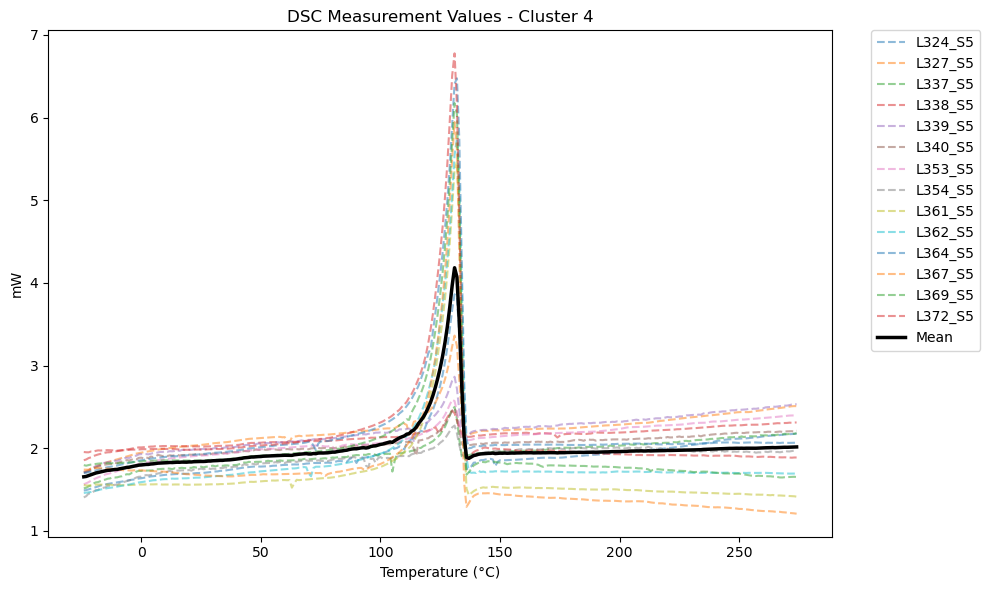

                    Count  Anteil (%)
Matrix                               
Sand                    6       42.86
Sediment Elbe           5       35.71
Sediment Weißeritz      3       21.43
------------------------------------------------------------------------------------------------------------------------


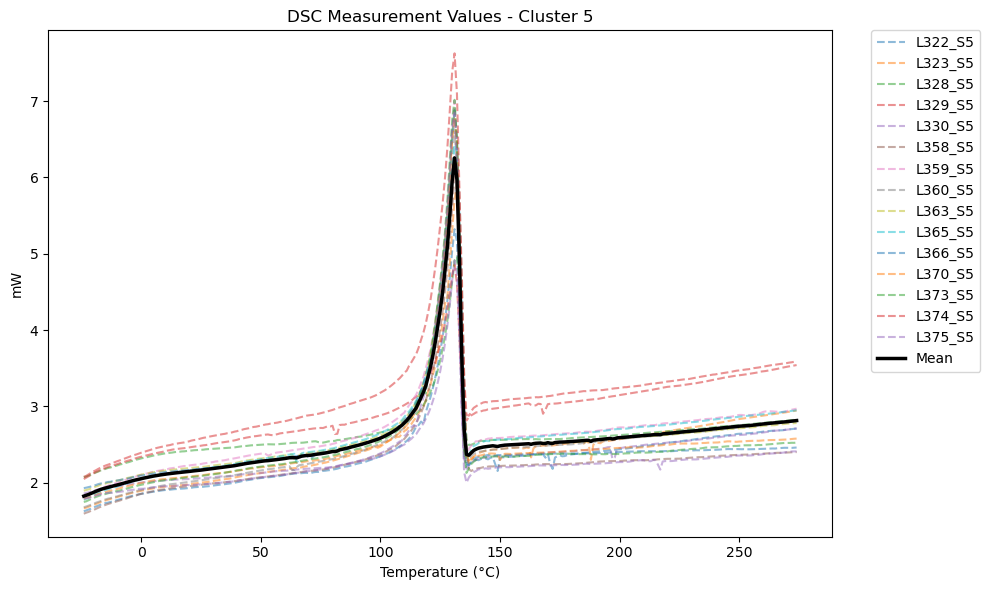

               Count  Anteil (%)
Matrix                          
Sand              10       66.67
Sediment Elbe      5       33.33
------------------------------------------------------------------------------------------------------------------------


In [11]:
cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)

## II) Cluster nach Manhattan Distanz
> basierend auf Mittelwerten

In [13]:
file_path = "data/041a_mean_clustering.csv"
df_manhattan = pd.read_csv(file_path, index_col=0)
df_manhattan.head()

,Probe,Cluster
0,L001_S5,3
1,L002_S5,3
2,L003_S5,3
3,L004_S5,3
4,L005_S5,3


In [14]:
# Liste von Dict mit Clustern (Keys) und dazugehörigen Samples
cluster_to_samples = df_manhattan.groupby('Cluster')['Probe'].apply(list).to_dict()

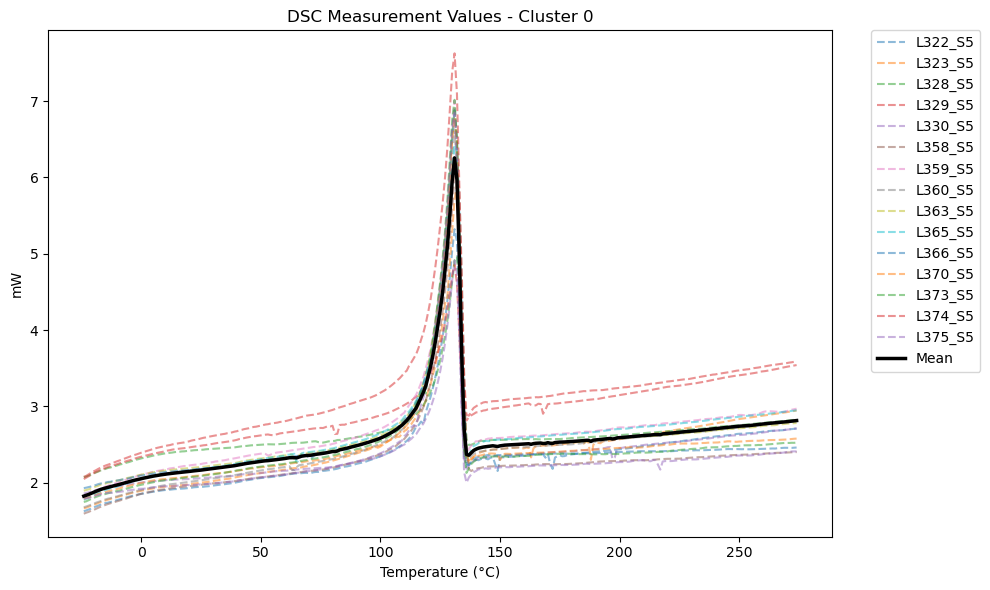

               Count  Anteil (%)
Matrix                          
Sand              10       66.67
Sediment Elbe      5       33.33
------------------------------------------------------------------------------------------------------------------------


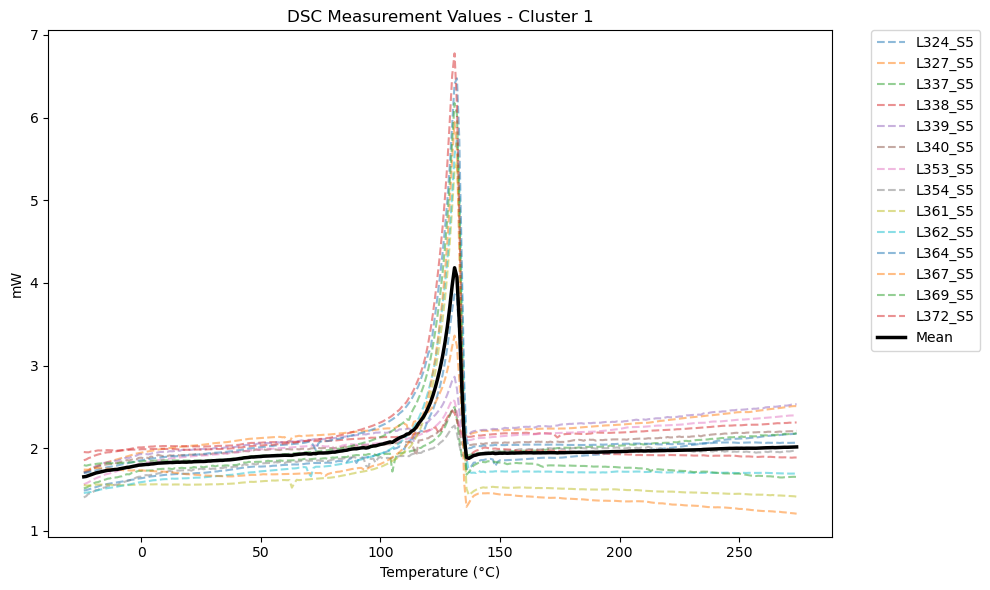

                    Count  Anteil (%)
Matrix                               
Sand                    6       42.86
Sediment Elbe           5       35.71
Sediment Weißeritz      3       21.43
------------------------------------------------------------------------------------------------------------------------


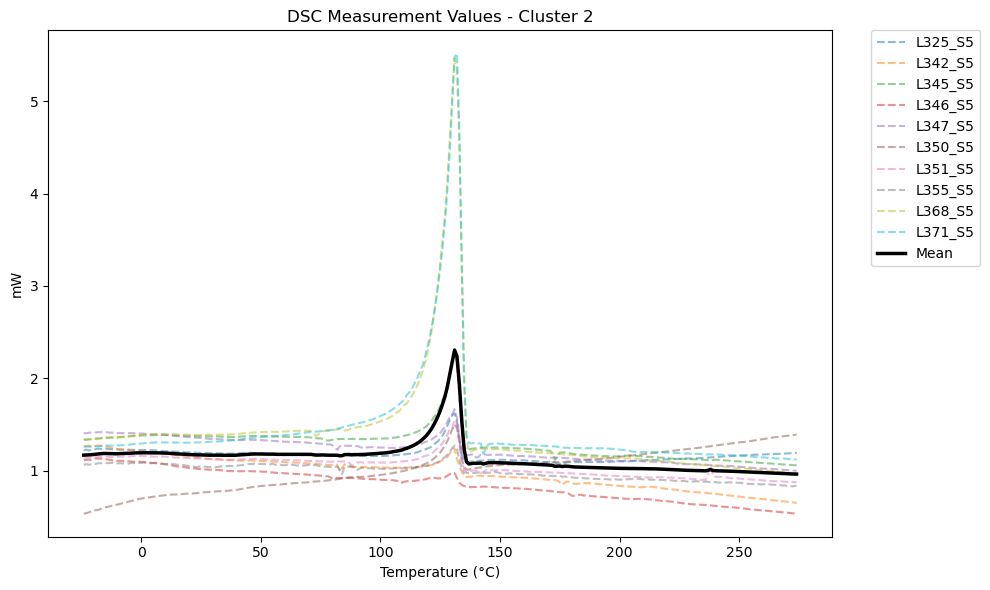

                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz      7        70.0
Sand                    2        20.0
Sediment Elbe           1        10.0
------------------------------------------------------------------------------------------------------------------------


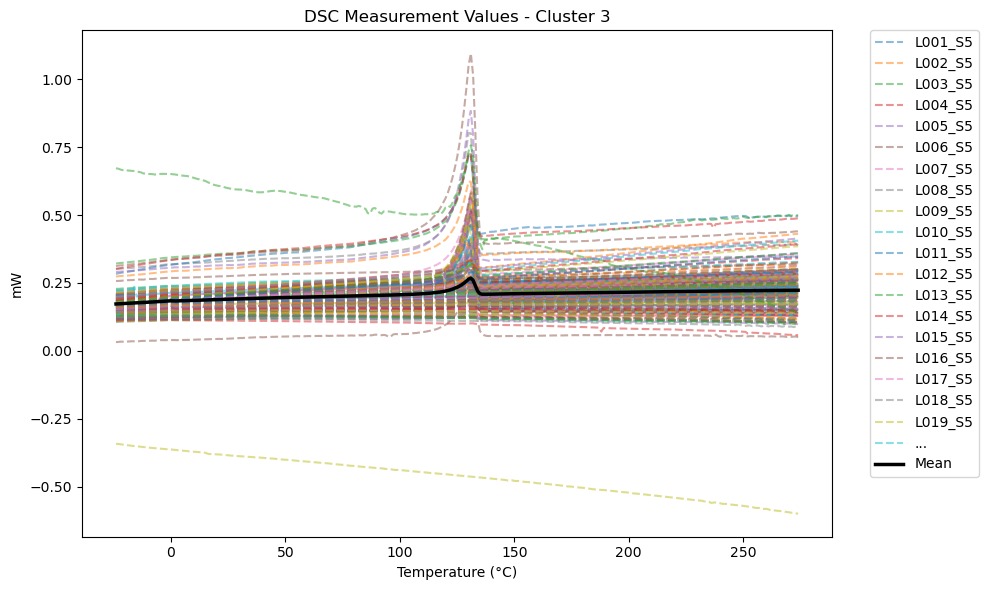

                    Count  Anteil (%)
Matrix                               
Modellsand             90       29.51
Sediment Weißeritz     45       14.75
Sediment Elbe          45       14.75
Sand                   39       12.79
Nicht vorhanden        86       28.20
------------------------------------------------------------------------------------------------------------------------


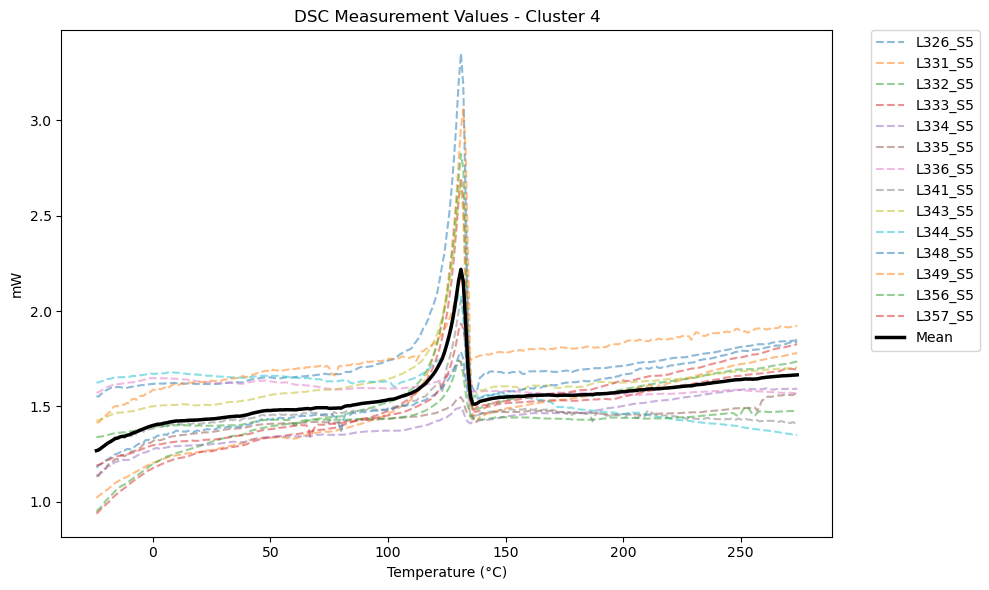

                    Count  Anteil (%)
Matrix                               
Sediment Elbe           7        50.0
Sediment Weißeritz      7        50.0
------------------------------------------------------------------------------------------------------------------------


In [15]:
cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)

## III) Cluster nach euklidischer Distanz
> basieren auf Mittelwerten & dHm_J/g und Tm_C

In [17]:
file_path = "data/041a_mean_clustering.csv"
df_enriched = pd.read_csv(file_path, index_col=0)
#df_enriched['Probe'] = df_enriched['Probe'].astype(str) + '_S5'
df_enriched.head()

,Probe,Cluster
0,L001_S5,3
1,L002_S5,3
2,L003_S5,3
3,L004_S5,3
4,L005_S5,3


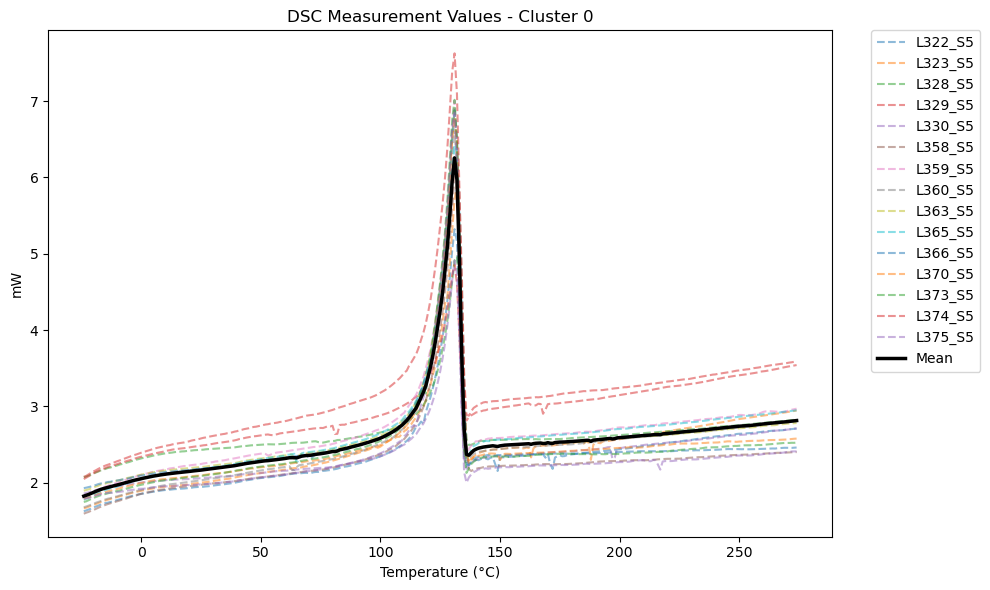

               Count  Anteil (%)
Matrix                          
Sand              10       66.67
Sediment Elbe      5       33.33
------------------------------------------------------------------------------------------------------------------------


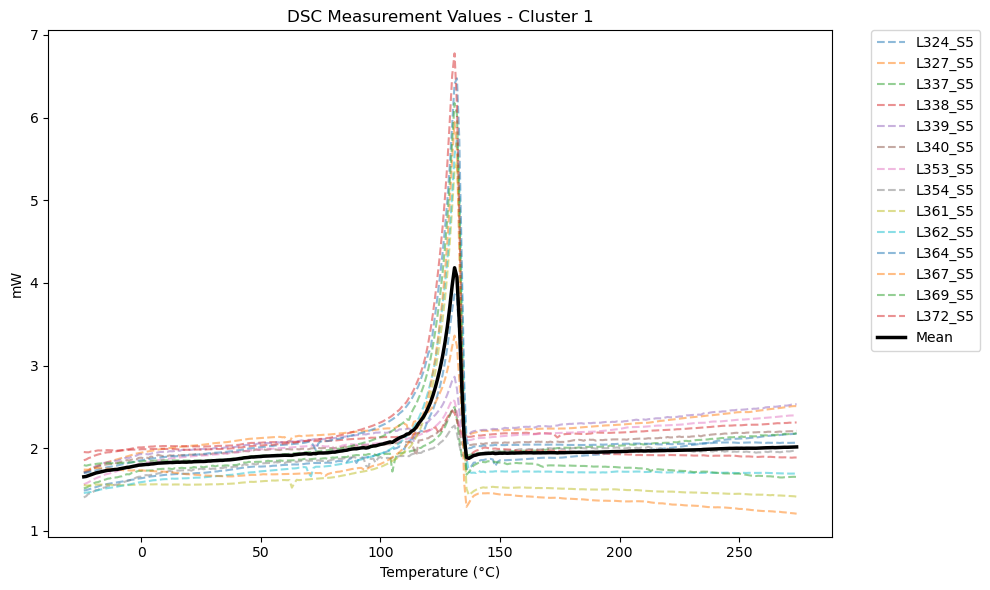

                    Count  Anteil (%)
Matrix                               
Sand                    6       42.86
Sediment Elbe           5       35.71
Sediment Weißeritz      3       21.43
------------------------------------------------------------------------------------------------------------------------


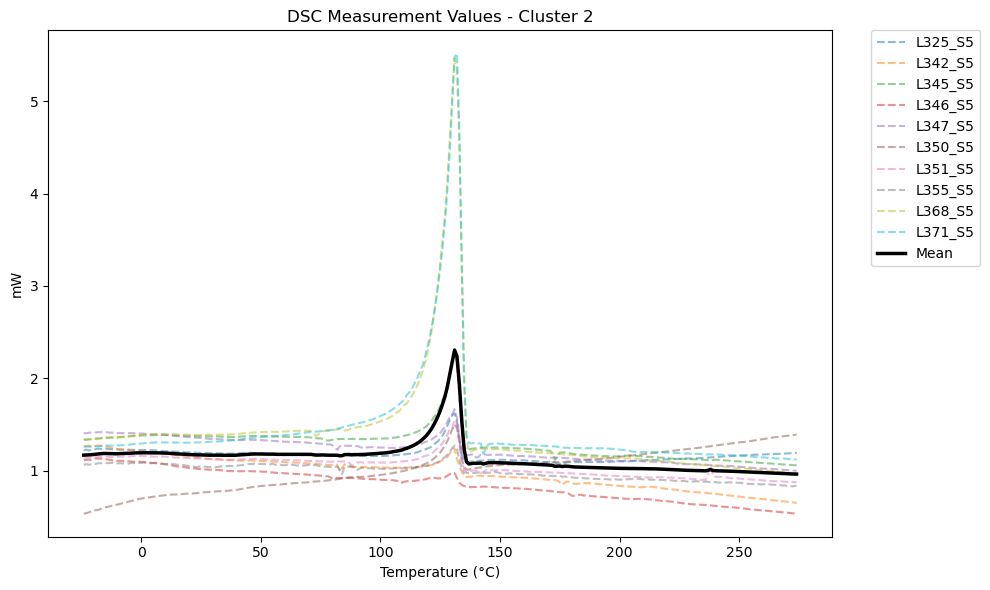

                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz      7        70.0
Sand                    2        20.0
Sediment Elbe           1        10.0
------------------------------------------------------------------------------------------------------------------------


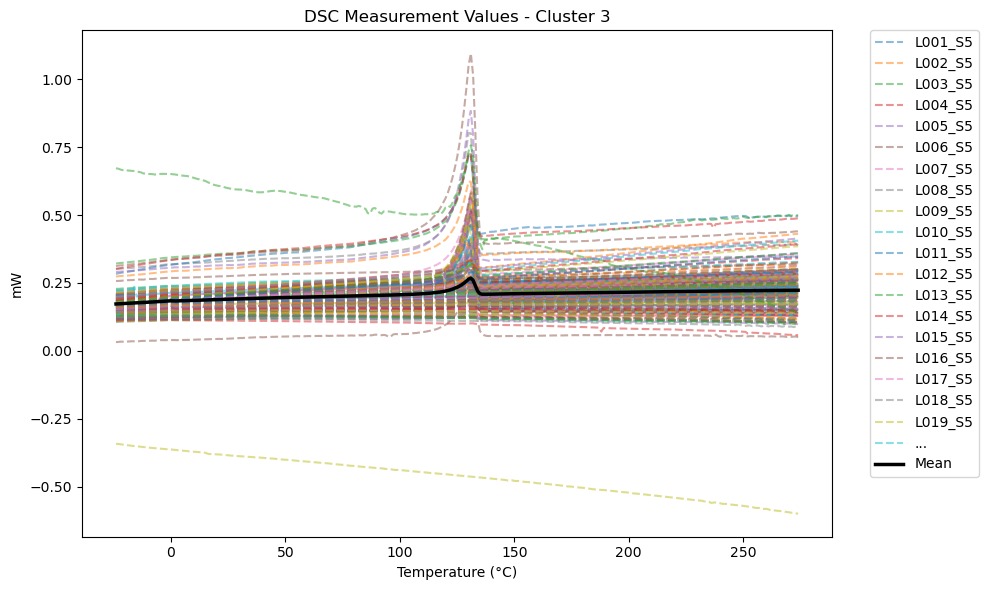

                    Count  Anteil (%)
Matrix                               
Modellsand             90       29.51
Sediment Weißeritz     45       14.75
Sediment Elbe          45       14.75
Sand                   39       12.79
Nicht vorhanden        86       28.20
------------------------------------------------------------------------------------------------------------------------


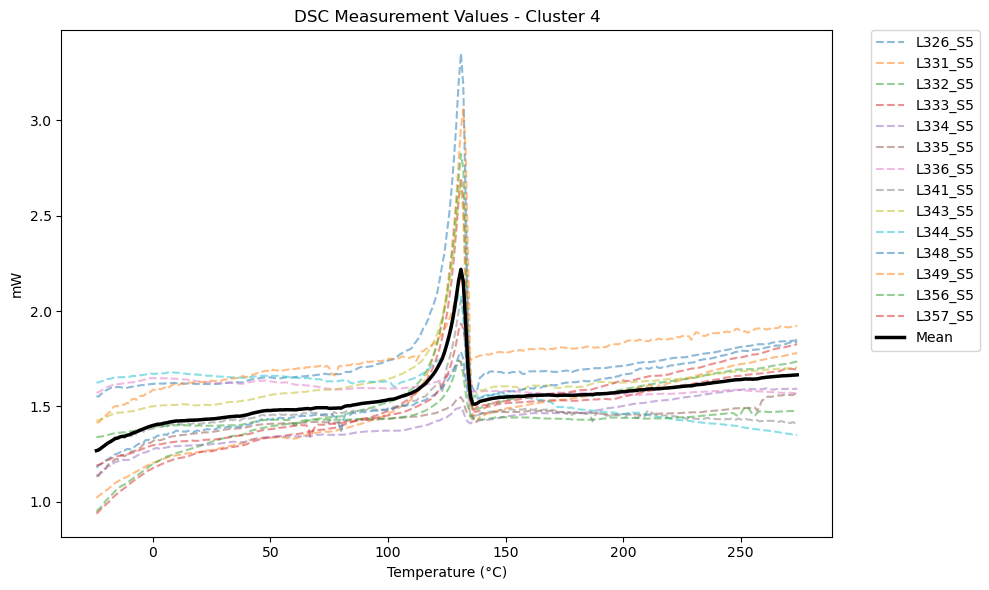

                    Count  Anteil (%)
Matrix                               
Sediment Elbe           7        50.0
Sediment Weißeritz      7        50.0
------------------------------------------------------------------------------------------------------------------------


In [18]:
df_temp = df_enriched

# Liste von Dict mit Clustern (Keys) und dazugehörigen Samples
cluster_to_samples = df_temp.groupby('Cluster')['Probe'].apply(list).to_dict()

cluster_list = list(cluster_to_samples.items())
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

for i in range(len(cluster_list)):
    cluster, samples = cluster_list[i]
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values_with_mean(df_experiments_s5, samples, title=title)

    # Ausgabe der Ergebnisse
    print(results[cluster])
    print("-" * 120)